In [11]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler

In [12]:
# CSVファイルの読み込み
df1 = pd.read_csv('xy(1).csv')
df2 = pd.read_csv('xy(2).csv')
df3 = pd.read_csv('xy(3).csv')

# データの抽出
x_data_1 = df1['x'].values
x_data_2 = df2['x'].values
x_data_3 = df3['x'].values
y_data_1 = df1['y'].values
y_data_2 = df2['y'].values
y_data_3 = df3['y'].values

# データにラベルを付ける
labels_1 = np.ones_like(x_data_1)
labels_2 = np.ones_like(x_data_2) * 2
labels_3 = np.ones_like(x_data_3) * 3

# データの標準化
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_data_1_standardized = scaler_x.fit_transform(x_data_1.reshape(-1, 1)).flatten()
x_data_2_standardized = scaler_x.transform(x_data_2.reshape(-1, 1)).flatten()
x_data_3_standardized = scaler_x.transform(x_data_3.reshape(-1, 1)).flatten()

y_data_1_standardized = scaler_y.fit_transform(y_data_1.reshape(-1, 1)).flatten()
y_data_2_standardized = scaler_y.transform(y_data_2.reshape(-1, 1)).flatten()
y_data_3_standardized = scaler_y.transform(y_data_3.reshape(-1, 1)).flatten()

# 全データを結合
x_data_combined = np.concatenate([x_data_1, x_data_2, x_data_3])
y_data_combined = np.concatenate([y_data_1, y_data_2, y_data_3])
labels_combined = np.concatenate([labels_1, labels_2, labels_3])

In [13]:
# モデル関数の定義
def model(x, Kxx, Kyy, Kxy, label):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    
    if label == 1:
        k1 = C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)
        return k1
    elif label == 2:
        k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
        return k2
    elif label == 3:
        k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
        return k3

Fitted parameters: Kxx = -8.283191145698988 Kyy = 1.4233880646499464 Kxy = -0.5442895639323272


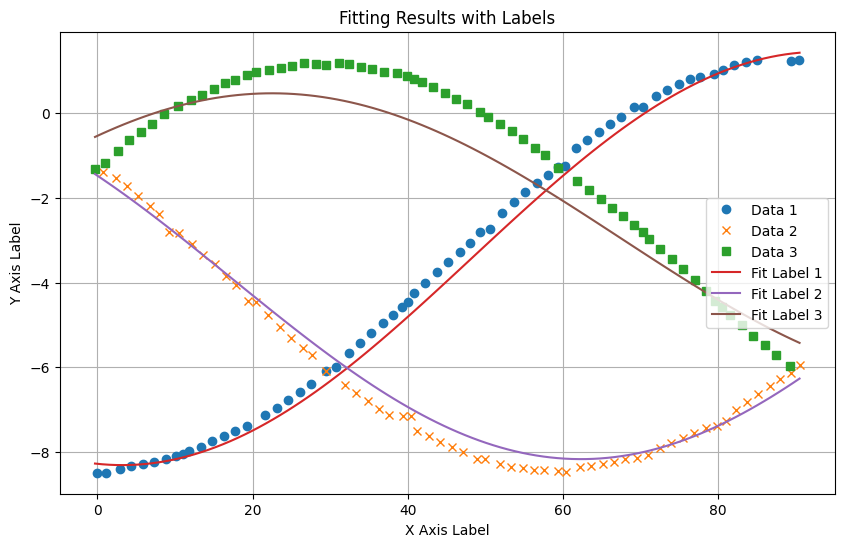

In [14]:
# データとラベルを結合
data_with_labels = np.vstack([x_data_combined, labels_combined]).T

# 目的関数の定義
def objective(x_labels, Kxx, Kyy, Kxy):
    y_model = np.zeros(len(x_labels))
    for i, (x, label) in enumerate(x_labels):
        y_model[i] = model(x, Kxx, Kyy, Kxy, label)
    return y_model

# フィッティング
initial_guess = [1, 1, 1]  # 適切な初期値を設定
params, params_covariance = curve_fit(objective, data_with_labels, y_data_combined, p0=initial_guess)

print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kxy =", params[2])

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))

# 各データセットのプロット
plt.plot(x_data_1, y_data_1, 'o', label='Data 1')
plt.plot(x_data_2, y_data_2, 'x', label='Data 2')
plt.plot(x_data_3, y_data_3, 's', label='Data 3')

# フィッティング結果のプロット
x_all = np.linspace(min(x_data_combined), max(x_data_combined), 100)
for label in [1, 2, 3]:
    y_fit = model(x_all, *params, label)
    plt.plot(x_all, y_fit, label=f'Fit Label {label}')

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Fitting Results with Labels')
plt.legend()
plt.grid(True)

plt.show()